# Chapter1. Practice List
1. Pandas - basic
2. Calculate statistical values  
3. Linear regression + Optimization(gradient descent)
4. Correlation

In [ ]:
import os
try:
    from google.colab import drive
    drive.mount('/content/drive')
    try:
      print('Set Directory to AI-ME-Practice Folder in Google Drive')
      data_dir = os.getcwd()+"/drive/MyDrive/AI-ME-Practice/data/"
      print(os.listdir(data_dir))
    except:
      print('Clone Git to /drive/')
      !git clone https://github.com/jongmoonha/AI-ME-Practice.git
      data_dir = "./AI-ME-Practice/data/"
except:
    data_dir = "./data/"
print(data_dir)

./data/


In [2]:
import pandas as pd
import numpy as np

# 1. Pandas 기본
> pd.DataFrame(데이터 프레임)
- attribute: data, index, columns

- pd.read_csv(): 파일 로드
- df.info(): 변수 종류, 타입
- df.columns: 칼럼 명
- df.loc, df.iloc: 행, 열 조회 location - label, boolean, indexlocation - index
- value_counts()
- sort_values(by= )
- groupby()
- apply()

(더 공부하고 싶다면)  
https://datadoctorblog.com/2023/04/02/Py-Basic-Pandas-DataFrame/

### Data Read

In [3]:
df = pd.read_csv(data_dir+"production_monthly_1990.csv") # volumn: 생산량
print(df.shape)
df.head(3)

(332, 3)


,year,month,volumn
0,1990,1,1199.87
1,1990,2,1214.54
2,1990,3,1138.17


In [4]:
df.describe()

,year,month,volumn
count,332.000000,332.000000,332.000000
mean,2003.337349,6.451807,1309.801446
std,8.000419,3.447592,159.087274
min,1990.000000,1.000000,954.780000
25%,1996.000000,3.000000,1198.012500
50%,2003.000000,6.000000,1298.800000
75%,2010.000000,9.000000,1415.967500
max,2017.000000,12.000000,1678.980000


### Sort by Values

In [5]:
print(df.sort_values(by="year", ascending=False))

     year  month   volumn
331  2017      8  1368.74
330  2017      7  1231.03
329  2017      6  1250.43
328  2017      5  1223.05
327  2017      4  1289.15
..    ...    ...      ...
8    1990      9  1303.67
9    1990     10  1493.49
10   1990     11  1598.42
11   1990     12  1613.31
0    1990      1  1199.87

[332 rows x 3 columns]


### Counts

In [6]:
print(df.value_counts("year"))

year
1990    12
1991    12
2016    12
2015    12
2014    12
2013    12
2012    12
2011    12
2010    12
2009    12
2008    12
2007    12
2006    12
2005    12
2004    12
2003    12
2002    12
2001    12
2000    12
1999    12
1998    12
1997    12
1996    12
1995    12
1994    12
1993    12
1992    12
2017     8
Name: count, dtype: int64


In [7]:
print(df.value_counts("year").sort_index(ascending=True))

year
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
2007    12
2008    12
2009    12
2010    12
2011    12
2012    12
2013    12
2014    12
2015    12
2016    12
2017     8
Name: count, dtype: int64


### loc

In [8]:
print(df.loc[0])
# print(df[0])

year      1990.00
month        1.00
volumn    1199.87
Name: 0, dtype: float64


### groupby
- 연도별 생산량 평균 구하기  
1) .loc  
2) for문   
3) groupby   
refer: https://datadoctorblog.com/2023/04/28/Py-Basic-Pandas-Groupby/

In [9]:
# df.sort_values(by='year').value_counts()
list_year = list(df['year'].unique())
print(list_year)

[1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]


#### Find Index

In [10]:
df["year"]==list_year[0]

0       True
1       True
2       True
3       True
4       True
       ...  
327    False
328    False
329    False
330    False
331    False
Name: year, Length: 332, dtype: bool

#### Extract Year from the index

In [11]:
df_each_year = df.loc[df["year"]==list_year[0]]
print(df_each_year)

    year  month   volumn
0   1990      1  1199.87
1   1990      2  1214.54
2   1990      3  1138.17
3   1990      4  1061.09
4   1990      5  1064.13
5   1990      6  1113.13
6   1990      7  1163.86
7   1990      8  1227.80
8   1990      9  1303.67
9   1990     10  1493.49
10  1990     11  1598.42
11  1990     12  1613.31


#### Volume for each year

In [12]:
df_year_volumn = df.loc[df["year"]==list_year[0]]["volumn"]
print(df_year_volumn)

0     1199.87
1     1214.54
2     1138.17
3     1061.09
4     1064.13
5     1113.13
6     1163.86
7     1227.80
8     1303.67
9     1493.49
10    1598.42
11    1613.31
Name: volumn, dtype: float64


#### Mean

In [13]:
print(df_year_volumn.mean())

1265.9566666666667


#### Mean Volume for every year

In [14]:
# 2)
yr_volumn_mean = []
for year in list_year:
  yr_volumn_mean.append(df.loc[df["year"]==year,"volumn"].mean())
yr_volumn_mean

[1265.9566666666667,
 1316.8275,
 1231.8875,
 1255.1999999999998,
 1255.1266666666666,
 1270.1575,
 1322.3174999999999,
 1347.9641666666666,
 1425.135,
 1396.5541666666666,
 1462.28,
 1446.6299999999999,
 1385.381666666667,
 1379.4608333333333,
 1394.5916666666665,
 1439.4350000000002,
 1380.4625000000003,
 1300.735,
 1186.1866666666667,
 1133.7708333333335,
 1242.165,
 1207.1499999999999,
 1199.9991666666667,
 1251.1333333333332,
 1250.7891666666667,
 1330.1916666666668,
 1301.9941666666666,
 1287.5349999999999]

#### Mean Volume for every year (Using group by)

In [15]:
df_groupby_year_month = df.groupby(["year","month"])["volumn"]
df_groupby_year = df.groupby(["year"])["volumn"]
print(df_groupby_year_month)

In [16]:
print(df_groupby_year_month.mean())
print(df_groupby_year.mean())

year  month
1990  1        1199.87
      2        1214.54
      3        1138.17
      4        1061.09
      5        1064.13
                ...   
2017  4        1289.15
      5        1223.05
      6        1250.43
      7        1231.03
      8        1368.74
Name: volumn, Length: 332, dtype: float64
year
1990    1265.956667
1991    1316.827500
1992    1231.887500
1993    1255.200000
1994    1255.126667
1995    1270.157500
1996    1322.317500
1997    1347.964167
1998    1425.135000
1999    1396.554167
2000    1462.280000
2001    1446.630000
2002    1385.381667
2003    1379.460833
2004    1394.591667
2005    1439.435000
2006    1380.462500
2007    1300.735000
2008    1186.186667
2009    1133.770833
2010    1242.165000
2011    1207.150000
2012    1199.999167
2013    1251.133333
2014    1250.789167
2015    1330.191667
2016    1301.994167
2017    1287.535000
Name: volumn, dtype: float64


#### agg

In [17]:
print(df_groupby_year.agg(["min", "max", "mean"]))

          min      max         mean
year                               
1990  1061.09  1613.31  1265.956667
1991  1139.07  1551.77  1316.827500
1992  1076.76  1466.11  1231.887500
1993  1061.28  1497.98  1255.200000
1994  1044.15  1499.80  1255.126667
1995  1123.16  1546.87  1270.157500
1996  1137.70  1633.81  1322.317500
1997  1168.54  1632.32  1347.964167
1998  1273.98  1643.83  1425.135000
1999  1275.27  1614.78  1396.554167
2000  1304.64  1664.45  1462.280000
2001  1355.22  1555.92  1446.630000
2002  1222.20  1542.89  1385.381667
2003  1234.22  1593.49  1379.460833
2004  1226.44  1597.74  1394.591667
2005  1281.62  1678.98  1439.435000
2006  1220.54  1584.31  1380.462500
2007  1096.65  1460.84  1300.735000
2008  1021.42  1390.49  1186.186667
2009   954.78  1484.07  1133.770833
2010  1073.90  1515.33  1242.165000
2011  1075.52  1401.91  1207.150000
2012  1024.21  1393.68  1199.999167
2013  1101.10  1478.89  1251.133333
2014  1057.14  1548.74  1250.789167
2015  1161.36  1520.93  1330

#### apply
- apply(func="mean", axis=1)
- apply(lambda x: x.mean()+100, axis=1)
- apply(사용자함수, axis=1)  
ref: https://datadoctorblog.com/2023/05/01/Py-Basic-Pandas-Apply/

In [18]:
df_groupby_year.apply("mean")

year
1990    1265.956667
1991    1316.827500
1992    1231.887500
1993    1255.200000
1994    1255.126667
1995    1270.157500
1996    1322.317500
1997    1347.964167
1998    1425.135000
1999    1396.554167
2000    1462.280000
2001    1446.630000
2002    1385.381667
2003    1379.460833
2004    1394.591667
2005    1439.435000
2006    1380.462500
2007    1300.735000
2008    1186.186667
2009    1133.770833
2010    1242.165000
2011    1207.150000
2012    1199.999167
2013    1251.133333
2014    1250.789167
2015    1330.191667
2016    1301.994167
2017    1287.535000
Name: volumn, dtype: float64

In [19]:
def mean_add_100(x):
  return x.mean()+100

In [20]:
print(df_groupby_year.apply(mean_add_100))

year
1990    1365.956667
1991    1416.827500
1992    1331.887500
1993    1355.200000
1994    1355.126667
1995    1370.157500
1996    1422.317500
1997    1447.964167
1998    1525.135000
1999    1496.554167
2000    1562.280000
2001    1546.630000
2002    1485.381667
2003    1479.460833
2004    1494.591667
2005    1539.435000
2006    1480.462500
2007    1400.735000
2008    1286.186667
2009    1233.770833
2010    1342.165000
2011    1307.150000
2012    1299.999167
2013    1351.133333
2014    1350.789167
2015    1430.191667
2016    1401.994167
2017    1387.535000
Name: volumn, dtype: float64


# 2. 통계값 구하기
- df 중 NaN 값은 제외하고, numeric column 만 계산
- df기본 통계기능 .mean(), median(), var()
- df.describe()

#### Load data

In [21]:
df_iris = pd.read_csv(data_dir+"iris_missing.csv")
print(df_iris)
df_iris.describe()

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          NaN           NaN          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           NaN          2.5           NaN          NaN  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          NaN  virginica

[150 rows x 5 columns]


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,143.000000,137.000000,136.000000,144.000000
mean,5.853846,3.070073,3.811765,1.190972
std,0.823576,0.438642,1.749965,0.768243
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Read column names

In [22]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

#### Find NaN Rows

In [23]:
df_iris_notna = df_iris.notna()
df_iris_notna_rows = df_iris_notna.all(axis=1)

print(df_iris_notna)
print(df_iris_notna_rows)
print("\n\n", df_iris_notna_rows.value_counts())

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0            True        False         False         True     True
1            True         True          True         True     True
2            True         True          True         True     True
3            True         True          True         True     True
4            True         True          True         True     True
..            ...          ...           ...          ...      ...
145          True         True          True         True     True
146         False         True         False        False     True
147          True         True          True         True     True
148          True         True          True         True     True
149          True         True          True        False     True

[150 rows x 5 columns]
0      False
1       True
2       True
3       True
4       True
       ...  
145     True
146    False
147     True
148     True
149    False
Length: 150, dtype: bool


 T

In [24]:
df_iris_notna = df_iris.loc[df_iris_notna_rows]
print(df_iris_notna)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
5             5.4          3.9           1.7          0.4     setosa
..            ...          ...           ...          ...        ...
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica

[126 rows x 5 columns]


In [25]:
df_iris_notna_num = df_iris_notna[df_iris.columns[0:-1]]
df_iris_notna_num

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
...,...,...,...,...
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
147,6.5,3.0,5.2,2.0


In [26]:
df_iris_notna_num.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,126.000000,126.000000,126.000000,126.000000
mean,5.857937,3.080159,3.783333,1.219841
std,0.823490,0.443084,1.750828,0.764515
min,4.300000,2.000000,1.000000,0.100000
25%,5.125000,2.800000,1.600000,0.325000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


3 4. Optimization + Linear regression
> Linear regression using optimization(Gradient Descent)  
1) Generate random data of y = 0.1x + 0.3 + N(0, 0.3)   
2) Set y=Wx+b  
3) Find optimal W, b using gradient descent optimization  



In [27]:
import numpy as np
import random as random
import matplotlib.pyplot as plt

x shape is:  (100, 1)
y shape is:  (100, 1)


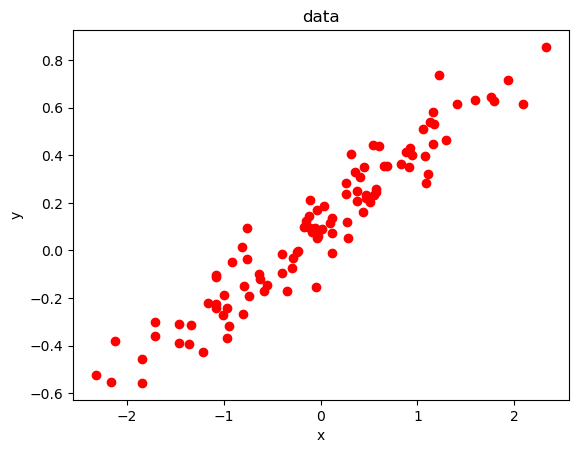

In [28]:
N = 100
theta0 = 0.1
theta1 = 0.3

x = np.random.normal(0.0, 1, N).reshape(-1, 1)
y = theta0 + theta1 * x
y = y + np.random.normal(0.0, 0.1, N).reshape(-1, 1)

print('x shape is: ', x.shape)
print('y shape is: ', y.shape)

plt.figure()
plt.plot(x, y, 'ro')
plt.title('data')
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Solving using Linear Algebra

In [29]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)
theta = np.array((A.T * A).I * A.T * y)

print(A.shape)
print(theta)

(100, 2)
[[0.10957892]
 [0.30928324]]


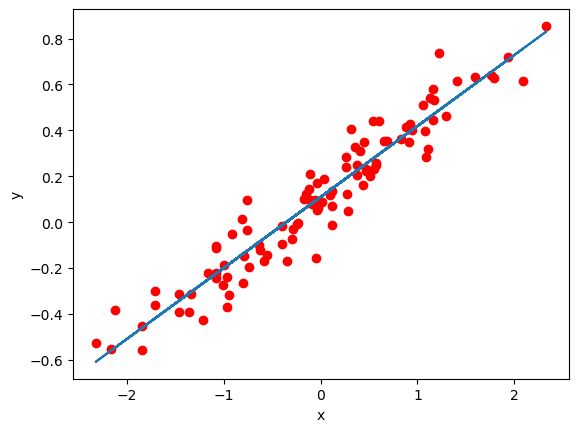

In [30]:
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, theta[1,0]*x + theta[0,0])
plt.xlabel('x'), plt.ylabel('y')
plt.show()

## Solving using Gradient Decent (1)

In [31]:
import numpy as np

# Initialize theta
theta = np.random.randn(2, 1)
theta = np.asmatrix(theta)

# Learning rate
alpha = 0.00001
n_iter = 3000
theta_history = []

# Gradient descent
for _ in range(n_iter):
    df = 2 * (A.T * A * theta - A.T * y)
    theta = theta - alpha * df
    theta_history.append(np.array(theta)[:,0])

print(theta)

[[0.10772954]
 [0.30547719]]


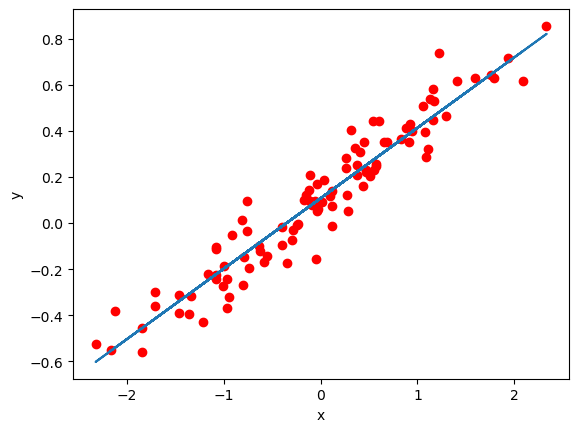

In [32]:
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, theta[1,0]*x + theta[0,0])
plt.xlabel('x'), plt.ylabel('y')
plt.show()

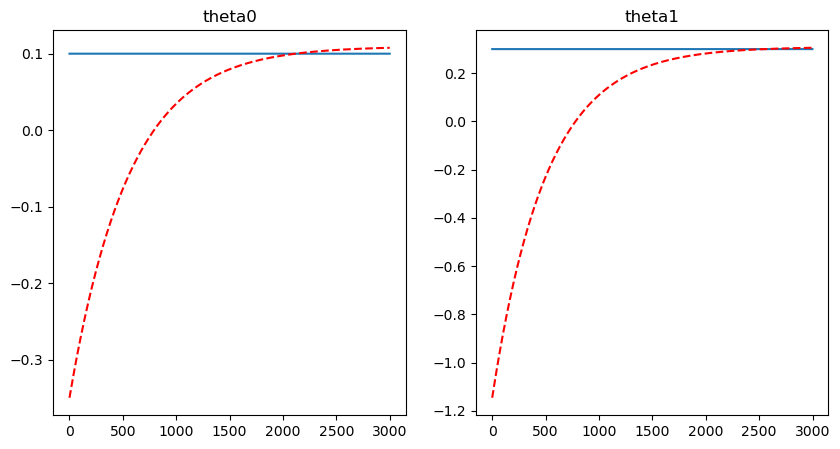

In [33]:
theta_history = np.array(theta_history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta0)
plt.plot(theta_history[:,0], 'r--')
plt.title('theta0')
plt.subplot(1,2,2)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta1)
plt.plot(theta_history[:,1], 'r--')
plt.title('theta1')
plt.show()

## Solving using Gradient Decent (2)

### Tensor Basics

In [34]:
import torch
# Enable autograd by GPU
tensor = torch.tensor([[1, 2], [3, 4]], dtype=torch.float, requires_grad=True)
print(tensor)

# detach(): Returns a new Tensor, detached from the current graph (disabling autograd)
detached_tensor = tensor.detach()
print(detached_tensor)

# item(): Returns the value of this tensor as a standard Python number (Valid only for one element tensor)
print(tensor.sum().item())

# numpy(): Returns the tensor as a NumPy ndarray
print(tensor.detach().numpy())

# grad: gradient of the tensor
print(tensor.grad)

# investigate how grad works
output = tensor.sum()
output.backward()
print(tensor.grad)

tensor([[1., 2.],
        [3., 4.]], requires_grad=True)
tensor([[1., 2.],
        [3., 4.]])
10.0
[[1. 2.]
 [3. 4.]]
None
tensor([[1., 1.],
        [1., 1.]])


#### For more detailed explanation of autograd, let's see the following example
$y = x^2 + 2x + 1$


$dy = 2x + 2$


In [35]:
a = 2 # Try different values
a_tensor = torch.tensor(a,dtype=float, requires_grad=True)
b_tensor = a_tensor**2 + 2*a_tensor + 1
print('x: ', a_tensor)
print('y: ', b_tensor)

# calculate the gradient
b_tensor.backward()
print('grad: ', a_tensor.grad)

x:  tensor(2., dtype=torch.float64, requires_grad=True)
y:  tensor(9., dtype=torch.float64, grad_fn=<AddBackward0>)
grad:  tensor(6., dtype=torch.float64)


### Let's solve our problem!

In [36]:
# Change the data format into pytorch format
x_tensor = torch.tensor(x).float()
y_tensor = torch.tensor(y).float()

In [37]:
# parameters to optimize
# Initial value is randomly set
# requires_grad=True: take into account in the gradient
import torch.optim.sgd

t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)

step_size = 0.001
optimizer = torch.optim.SGD([t1, t0], lr=step_size)

# Gradient Descent
n_iter = 100
theta_history = []
for t in range(0, n_iter):
    # Calculate loss
    loss = ((y_tensor - (t1*x_tensor + t0))**2).sum()
    
    # Calculate gradient
    loss.backward()

    # This is how the optimizer actually works (theta0 and 1 are updated)
    optimizer.step()
    optimizer.zero_grad()
    
    # Save Log
    theta_history.append([t0.item(), t1.item()])
    if (t%10==0):
        print('iter= {},\t theta0: {:3f},\t theta1: {:3f}, \t loss: {:3f}'\
              .format(t,t0.item(), t1.item(), loss.item()))
theta_history = np.array(theta_history)
opt = loss.item()

iter= 0,	 theta0: 0.473820,	 theta1: 0.171610, 	 loss: 25.336609
iter= 10,	 theta0: 0.147613,	 theta1: 0.297731, 	 loss: 1.106277
iter= 20,	 theta0: 0.113575,	 theta1: 0.308378, 	 loss: 0.855121
iter= 30,	 theta0: 0.110001,	 theta1: 0.309221, 	 loss: 0.852470
iter= 40,	 theta0: 0.109624,	 theta1: 0.309280, 	 loss: 0.852441
iter= 50,	 theta0: 0.109584,	 theta1: 0.309283, 	 loss: 0.852441
iter= 60,	 theta0: 0.109579,	 theta1: 0.309283, 	 loss: 0.852441
iter= 70,	 theta0: 0.109579,	 theta1: 0.309283, 	 loss: 0.852441
iter= 80,	 theta0: 0.109579,	 theta1: 0.309283, 	 loss: 0.852441
iter= 90,	 theta0: 0.109579,	 theta1: 0.309283, 	 loss: 0.852441


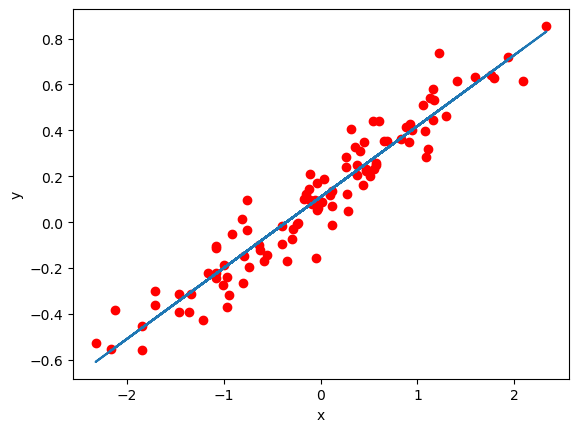

In [38]:
# check data and model
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x, (t1.detach().numpy()*x + t0.detach().numpy()))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

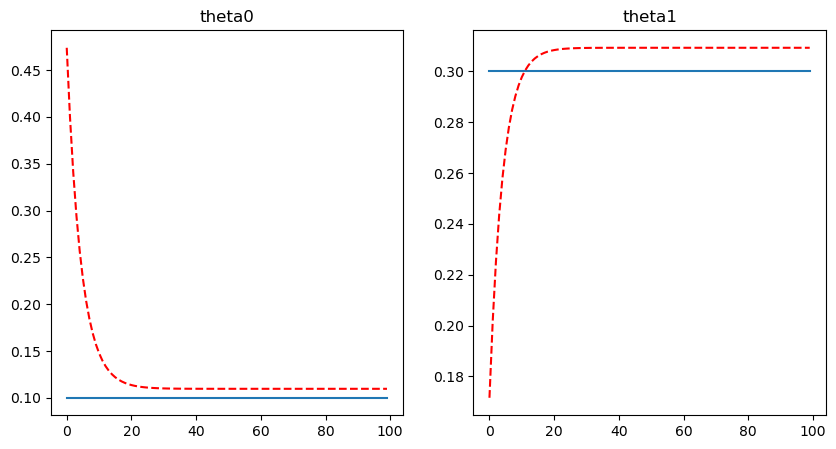

In [39]:
theta_history = np.array(theta_history)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta0)
plt.plot(theta_history[:,0], 'r--')
plt.title('theta0')
plt.subplot(1,2,2)
plt.plot(np.arange(0,n_iter), np.ones(n_iter)*theta1)
plt.plot(theta_history[:,1], 'r--')
plt.title('theta1')
plt.show()

In [40]:
# parameters to optimize
# Initial value is randomly set
# requires_grad=True: take into account in the gradient
import torch.optim.sgd

t0 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)
t1 = torch.tensor(np.random.randn(1), dtype=float, requires_grad=True)

# theta_math = np.asmatrix(np.concatenate([t0.detach().numpy(), t1.detach().numpy()]))

step_size = 0.001
optimizer = torch.optim.SGD([t1, t0], lr=step_size)

# Gradient Descent
n_iter = 100
theta_history = []
for t in range(0, n_iter):
    # Calculate loss
    loss = ((y_tensor - (t1*x_tensor + t0))**2).sum()
    
    # Calculate gradient
    loss.backward()
    
    ##################################################################
    # Investigate the manual gradient descent step
    # Code within this block (###) is just for the investigation, not required for the optimizer
    # Gradient using torch
    theta0_grad = t0.grad
    theta1_grad = t1.grad
    t0_manual1 = t0.item() - step_size * theta0_grad
    t1_manual1 = t1.item() - step_size * theta1_grad
    
    # Gradient using math
    theta_math = np.asmatrix(np.concatenate([t0.detach().numpy(), t1.detach().numpy()])).T
    df = 2 * (A.T * A * theta_math - A.T * y)
    theta_math = theta_math - step_size * df
    t0_manual2 = theta_math[0,0]
    t1_manual2 = theta_math[1,0]
    ##################################################################
    
    # This is how the optimizer actually works (theta0 and 1 are updated)
    optimizer.step()
    optimizer.zero_grad()
    
    # Save Log
    theta_history.append([t0.item(), t1.item()])
    if (t%10==0):
        print('iter= {},\t t0 (manual 1, 2, optim): {:3f}, {:3f}, {:3f},\t t0 (manual 1, 2, optim): {:3f}, {:3f}, {:3f},'\
              .format(t,t0.item(), t0_manual1.item(),t0_manual2, t1.item(), t1_manual1.item(),t1_manual2))
theta_history = np.array(theta_history)
opt = loss.item()

iter= 0,	 t0 (manual 1, 2, optim): -1.044736, -1.044736, -1.044736,	 t0 (manual 1, 2, optim): -0.397334, -0.397334, -0.397334,
iter= 10,	 t0 (manual 1, 2, optim): -0.020836, -0.020836, -0.020836,	 t0 (manual 1, 2, optim): 0.223852, 0.223852, 0.223852,
iter= 20,	 t0 (manual 1, 2, optim): 0.094796, 0.094796, 0.094796,	 t0 (manual 1, 2, optim): 0.299034, 0.299034, 0.299034,
iter= 30,	 t0 (manual 1, 2, optim): 0.107898, 0.107898, 0.107898,	 t0 (manual 1, 2, optim): 0.308061, 0.308061, 0.308061,
iter= 40,	 t0 (manual 1, 2, optim): 0.109387, 0.109387, 0.109387,	 t0 (manual 1, 2, optim): 0.309138, 0.309138, 0.309138,
iter= 50,	 t0 (manual 1, 2, optim): 0.109557, 0.109557, 0.109557,	 t0 (manual 1, 2, optim): 0.309266, 0.309266, 0.309266,
iter= 60,	 t0 (manual 1, 2, optim): 0.109576, 0.109576, 0.109576,	 t0 (manual 1, 2, optim): 0.309281, 0.309281, 0.309281,
iter= 70,	 t0 (manual 1, 2, optim): 0.109579, 0.109579, 0.109579,	 t0 (manual 1, 2, optim): 0.309283, 0.309283, 0.309283,
iter= 80,	 t0 (m

# 4. Correlation Analysis
- .corr() for pandas (default: pearson, method=)
- scipy.stats  library can!
reference: https://datadoctorblog.com/2023/08/08/Py-Stat-correlation-analysis/

In [41]:
df_iris_notna_num.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.071370,0.860217,0.808743
Sepal.Width,-0.071370,1.000000,-0.406533,-0.338672
Petal.Length,0.860217,-0.406533,1.000000,0.961360
Petal.Width,0.808743,-0.338672,0.961360,1.000000


In [42]:
# help(pd.DataFrame)

In [43]:
df_iris_notna_num.corr(method = "spearman")

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.113584,0.873034,0.823997
Sepal.Width,-0.113584,1.000000,-0.272651,-0.259357
Petal.Length,0.873034,-0.272651,1.000000,0.940600
Petal.Width,0.823997,-0.259357,0.940600,1.000000


In [44]:
from scipy.stats import pearsonr, spearmanr, kendalltau
print(pearsonr(df_iris_notna_num["Sepal.Length"], df_iris_notna_num["Petal.Length"]))
print(spearmanr(df_iris_notna_num["Sepal.Length"], df_iris_notna_num["Petal.Length"]))
print(kendalltau(df_iris_notna_num["Sepal.Length"], df_iris_notna_num["Petal.Length"]))

PearsonRResult(statistic=0.8602174805176663, pvalue=4.4624219928670217e-38)
SignificanceResult(statistic=0.8730341892821037, pvalue=1.7324794500960063e-40)
SignificanceResult(statistic=0.7064455853595843, pvalue=4.351505558359676e-30)
